<a href="https://colab.research.google.com/github/MaxZx3000/Heart-Disease/blob/main/Assignment_1_Indonesia_AI_(Anthony_Kevin_Oktavius).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Deep Learning

Dibuat oleh: Anthony Kevin Oktavius

In [140]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

**Membuat Matplotlib menggunakan SVG untuk Menampilkan Gambar**

SVG adalah singkatan dari Scalable Vector Graphics. SVG adalah format gambar berbasis vektor. Ketika menggunakan SVG, gambar akan ditampilkan dalam resolusi yang lebih tinggi dibandingkan dengan JPEG.

Akan tetapi, matplotlib menggunakan JPEG untuk menampilkan gambar. Untuk menggunakan SVG, kita bisa menggunakan fungsi dari IPython bernama set_matplotlib_formats('svg')


In [28]:
display.set_matplotlib_formats('svg')

## Data Loading

Inisialisasi Field yang akan digunakan

In [141]:
# Given Data Fields

age_field = "age"
sex_field = "sex"
cp_field = "cp"
trestbps_field = "trestbps"
chol_field = "chol"
fbs_field = "fbs"
restecg_field = "restecg"
thalach_field = "thalach"
exang_field = "exang"
oldpeak_field = "oldpeak"
slope_field = "slope"
ca_field = "ca"
thal_field = "thal"
num_field = "num"

# New Fields


Mengunduh Dataset dan Inisialisasi nama kolom

In [142]:
dataset_column_names = [age_field, sex_field, cp_field, 
                        trestbps_field, chol_field, fbs_field, 
                        restecg_field, thalach_field, exang_field,
                        oldpeak_field, slope_field, ca_field,
                        thal_field, num_field]

dataset_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

cleveland_df = pd.read_csv(dataset_link, names = dataset_column_names)
cleveland_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Membagi field-field ke dalam numerikal dan kategorikal.

In [157]:
categorical_variables = [sex_field, cp_field, fbs_field, restecg_field,
                         exang_field, slope_field, ca_field, thal_field, 
                         num_field]

numerical_variables = [age_field, trestbps_field, 
                       chol_field, thalach_field, oldpeak_field]

Menentukan field features dan target pada dataset kita

In [144]:
target_field = num_field
features = dataset_column_names.copy()
features.remove(target_field)

Melihat Info Data pada Dataset Kita.

In [145]:
cleveland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Melihat Data Statistika pada Dataset Kita

In [146]:
cleveland_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


## Data Visualization

### Single Variable

Box Plot - Comparison

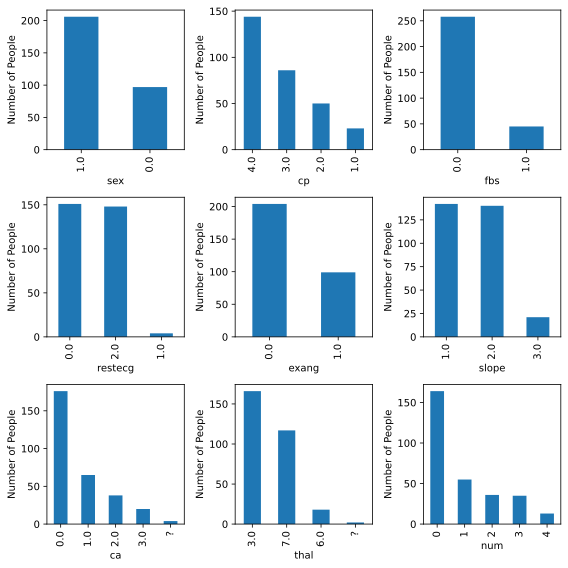

In [158]:
for index, feature in enumerate(categorical_variables):
  plt.subplot(3, 3, index + 1)
  plt.xlabel(feature)
  plt.ylabel("Number of People")
  
  cleveland_df[feature].value_counts().plot(kind = 'bar', figsize = (8, 8))

plt.tight_layout()
plt.show()

Kde Plot - Distribution

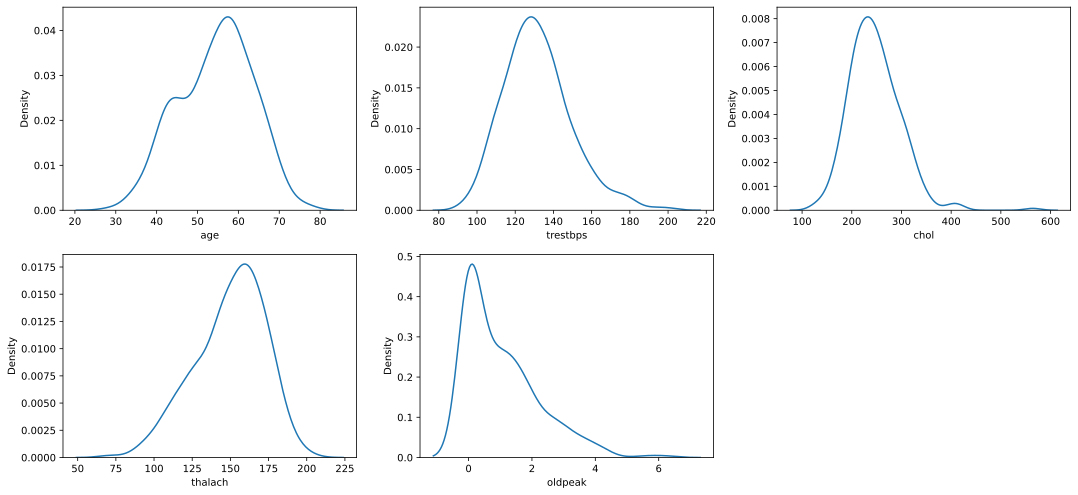

In [159]:
plt.figure(figsize = (15, 10))

for index, feature in enumerate(numerical_variables):
  plt.subplot(3, 3, index + 1)
  sns.kdeplot(x = cleveland_df[feature])

plt.tight_layout()
plt.show()

Box Plot - Distribution & Outlier Detection

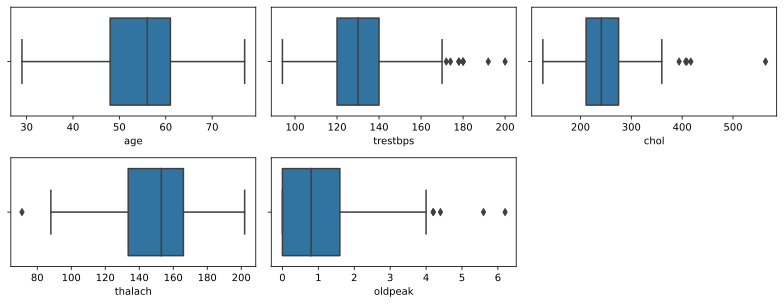

In [160]:
plt.figure(figsize = (11, 6))

for index, feature in enumerate(numerical_variables):
  plt.subplot(3, 3, index + 1)
  sns.boxplot(x = cleveland_df[feature])

plt.tight_layout()
plt.show()

### Two Variables

Stacked Bar Charts - Comparison & Composition

In [161]:
def make_stack_bar_plot(df, categorical_fields, x, y, cmap, ax):
  categorical_df = df[categorical_fields]
  target_field_per_categorical_df = categorical_df.groupby([x, y])[x]

  count_target_field_per_categorical_df = target_field_per_categorical_df.count()
  count_target_field_per_categorical_df = count_target_field_per_categorical_df.unstack()
  
  count_target_field_per_categorical_df.plot(kind = 'bar', 
                                             stacked = True, 
                                             cmap = cmap,
                                             ax = ax)

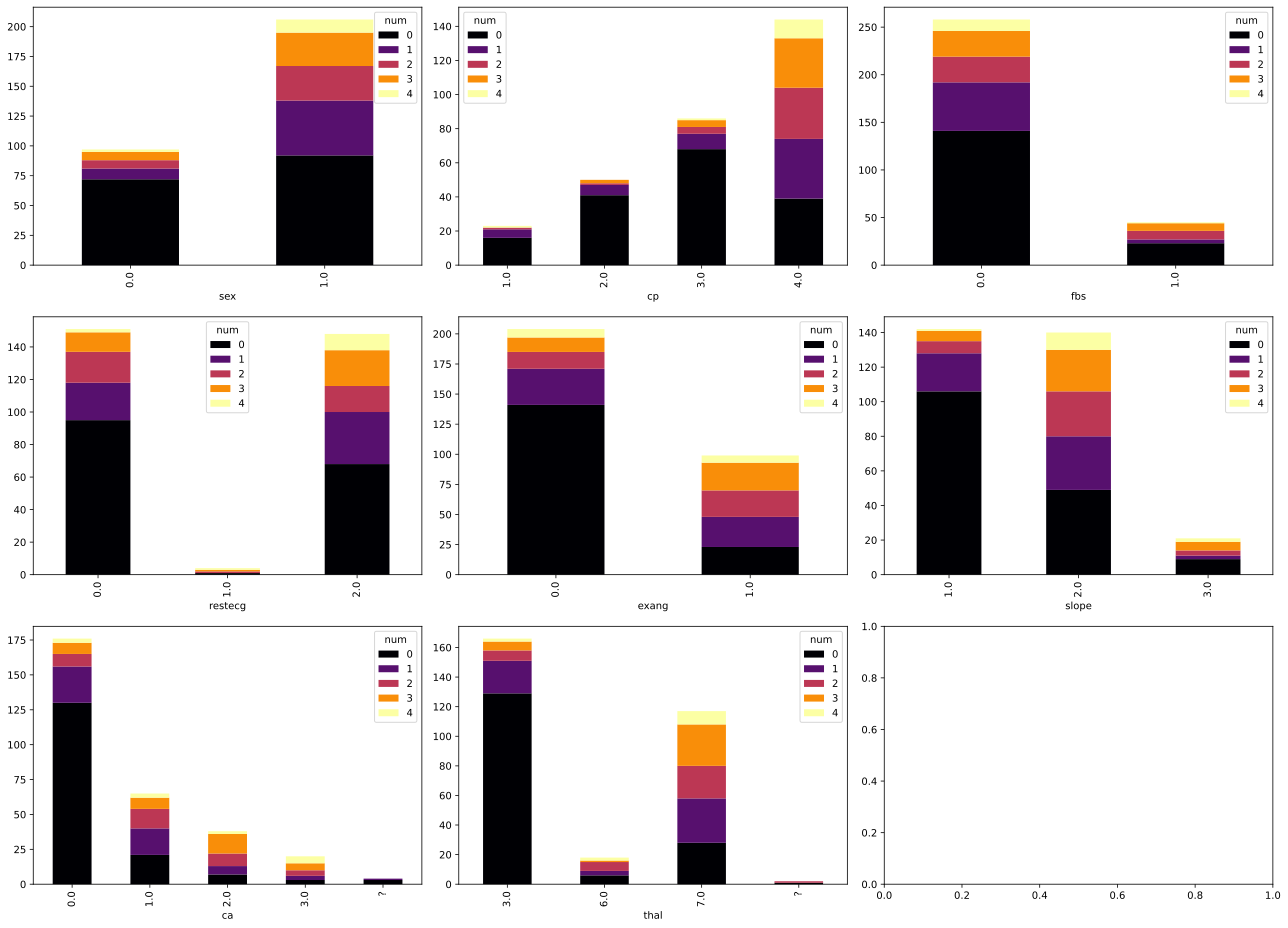

In [162]:
stacked_bar_chart_width = 0.9
survived_0_color = 'red'
survived_1_color = 'green'


fig, axes = plt.subplots(nrows = 3, ncols = 3)

axes = axes.flatten()
fig.set_figwidth(18)
fig.set_figheight(13)

multiple_bar_fields = categorical_variables.copy()

for index, field in enumerate(multiple_bar_fields):
    
    if field == target_field:
      continue
    
    make_stack_bar_plot(cleveland_df, categorical_variables, 
                        field, target_field, 
                        cmap = 'inferno',
                        ax = axes[index])
  
plt.tight_layout()
plt.show()

Kde Multiple Label plot - Distribution & Comparison

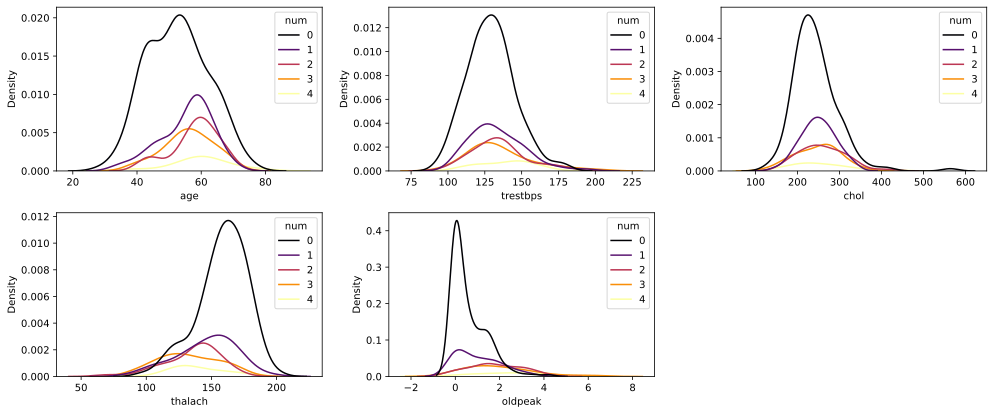

In [163]:
plt.figure(figsize = (14, 14))
kde_multiple_labels_features = numerical_variables.copy()
kde_multiple_labels_features.append(target_field)

for index, feature in enumerate(kde_multiple_labels_features):

  if feature == target_field:
    continue

  plt.subplot(5, 3, index + 1)
  sns.kdeplot(x = cleveland_df[feature],
              hue = cleveland_df[target_field],
              palette = 'inferno')
  
plt.tight_layout()
plt.show()

### Multiple Variables

Pairplot - Relationship & Distribution & Comparison

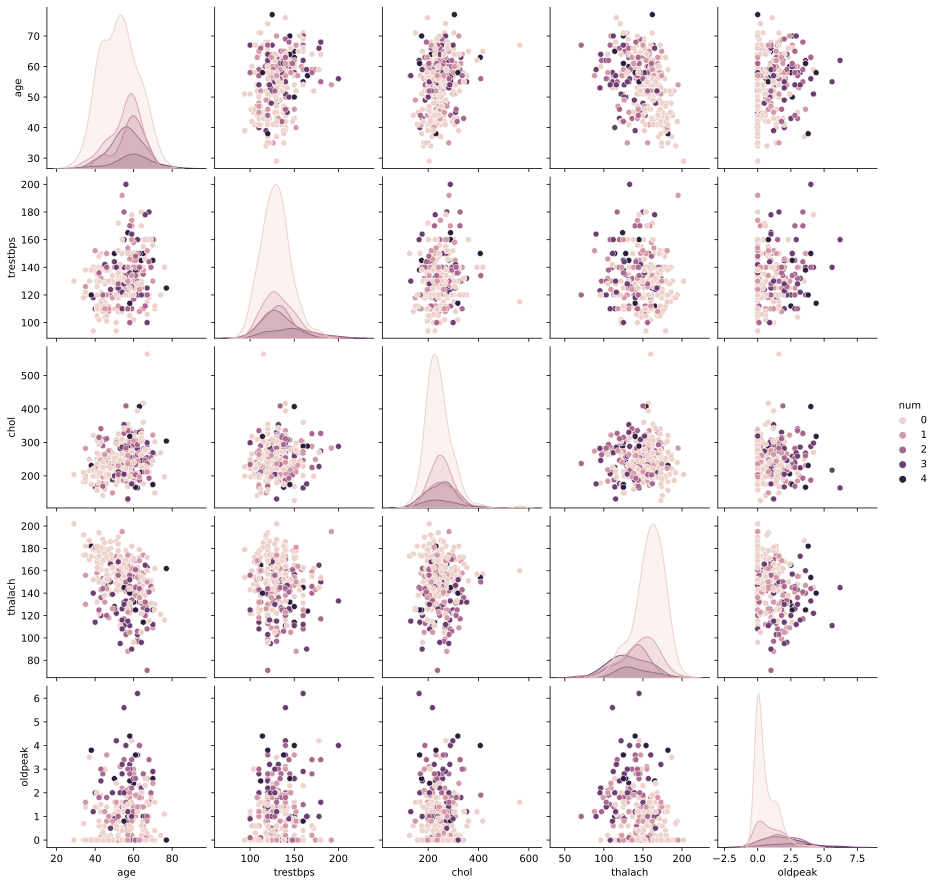

In [164]:
pairplot_fields = numerical_variables.copy()

sns.pairplot(cleveland_df, x_vars = pairplot_fields, y_vars = pairplot_fields, hue = target_field)

Heatmap - Relationship & Correlation

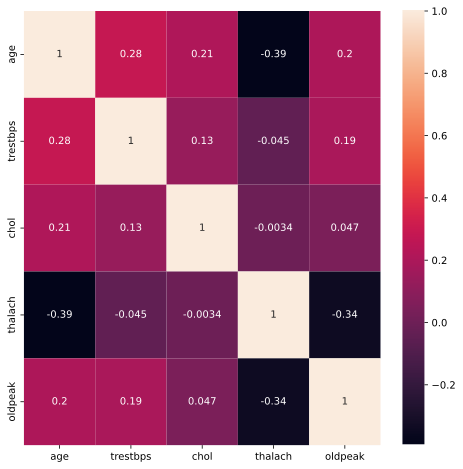

In [165]:
heatmap_fields = numerical_variables.copy()

plt.figure(figsize = (8, 8))

sns.heatmap(data = cleveland_df[heatmap_fields].corr(),
            annot = True)

plt.show()

## Data Preprocesing

### Missing Values

**Melihat Data yang bertanda '?'.**

Hal ini karena di heart.diseases.names tidak menjelaskan mengenai arti dari '?', maka saya akan menghapus row yang memiliki data tersebut.

Catatan: karena ? disebut dengan special character, maka kita harus menambahkan backslash ("\\?")

In [56]:
unusual_columns = [ca_field, thal_field]

cleveland_miss_value_df = cleveland_df[~cleveland_df[ca_field].str.contains("\?", na = False)]
cleveland_miss_value_df = cleveland_miss_value_df[~cleveland_miss_value_df[thal_field].str.contains("\?", na = False)]

print(cleveland_miss_value_df.shape)

(297, 14)


**Mencari value -9.0.**

Hal ini tertulis pada file heart-disease.names, bahwa -9.0 adalah missing attribute values.

Maka dari itu, kita akan mencoba menghapusnya dari data kita.

Note:
Karena tidak ada value dengan nilai -9.0, maka kita akan lanjut ke step berikutnya tanpa modifikasi lebih lanjut.

In [57]:
cleveland_miss_value_df = cleveland_miss_value_df[~(cleveland_miss_value_df == -9.0)]
print(cleveland_miss_value_df.shape)

(297, 14)


Finalisasi Missing Value

Tahap ini merupakan tahap dimana saya melakukan 

In [71]:
x = cleveland_miss_value_df[features]
y = cleveland_miss_value_df[target_field]

x[unusual_columns] = x[unusual_columns].astype('float32')
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float32
 12  thal      297 non-null    float32
dtypes: float32(2), float64(11)
memory usage: 30.2 KB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### Train Test Split

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state = 100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(237, 13)
(60, 13)
(237,)
(60,)


### MinMaxScaler

In [138]:
min_max_scaler = MinMaxScaler()
x_train_scaled = min_max_scaler.fit_transform(x_train.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

### One Hot Encoding

Melakukan One Hot Encoding untuk melakukan pemisahan antar kolom-kolom pada setiap data yang berbeda. Jika kolom tersebut terdapat pada kolom yang telah terbagi, maka nilainya adalah 1. Sebaliknya, nilainya adalah 0.

Sebagai contoh, perhatikan data pada 1 row berikut.

<table>
  <tr>
    <th>Sample Row</th>
  </tr>
  <tr>
    <td>1</td>
  </tr>
  <tr>
    <td>2</td>
  </tr>
  <tr>
    <td>2</td>
  </tr>
  <tr>
    <td>3</td>
  </tr>
  <tr>
    <td>4</td>
  </tr>
  <tr>
    <td>5</td>
  </tr>
  <tr>
    <td>5</td>
  </tr>
</table>

Maka ia akan menjadi seperti berikut.
<table>
  <tr>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
  </tr>
</table>


In [73]:
one_hot_encoder = OneHotEncoder()
y_train_encoded = one_hot_encoder.fit_transform(np.array([y_train]).reshape(-1, 1))
y_test_encoded = one_hot_encoder.transform(np.array([y_test]).reshape(-1, 1))

y_train_encoded = y_train_encoded.toarray()
y_test_encoded = y_test_encoded.toarray()

print(y_train_encoded.shape)
print(y_test_encoded.shape)

(237, 5)
(60, 5)


### Post Data Preprocessing Visualization

Melihat visualisasi data kategorikal dan numerikal setelah dilakukan train test split

Numerical Variable

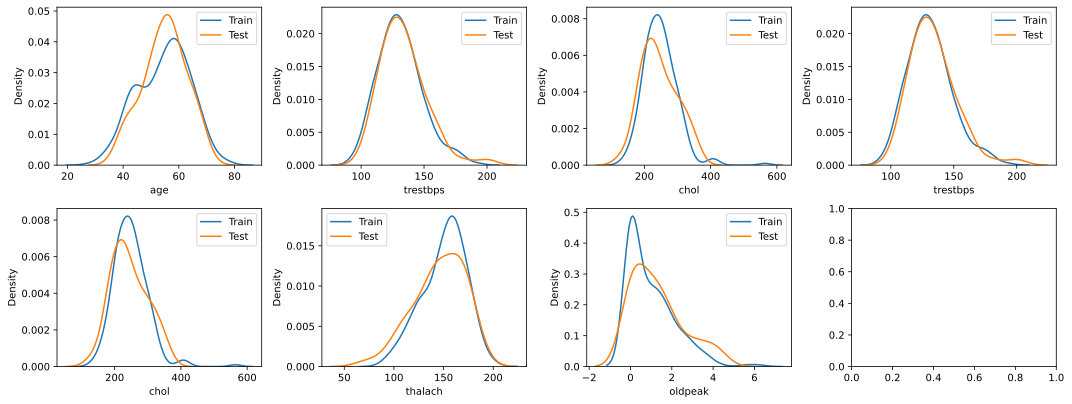

In [74]:
kde_plot_fields = numerical_variables.copy()

fig, axes = plt.subplots(nrows = 2, ncols = 4)
fig.set_figwidth(15)
fig.set_figheight(6)

ax_list = axes.flatten()

for index, feature in enumerate(kde_plot_fields):
  sns.kdeplot(x_train[feature], ax = ax_list[index])
  sns.kdeplot(x_test[feature], ax = ax_list[index])

for index, feature in enumerate(kde_plot_fields):
  ax_list[index].legend(['Train', 'Test'])

plt.tight_layout()
fig.subplots_adjust(top = 0.93)
plt.show()

Categorical Variables

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


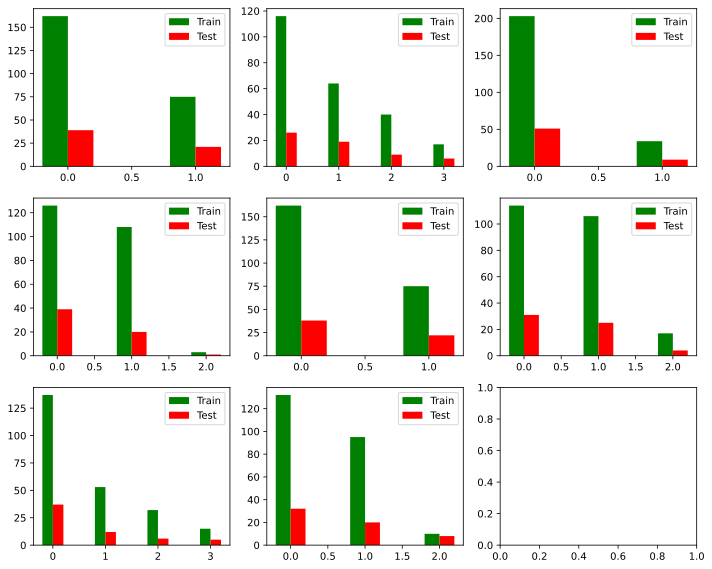

In [75]:
hist_fields = categorical_variables.copy()
hist_fields.remove(num_field)

fig, axes = plt.subplots(nrows = 3, ncols = 3)
fig.set_figwidth(10)
fig.set_figheight(8)

ax_list = axes.flatten()
width = .2

for index, feature in enumerate(hist_fields):

  x_train_count = x_train[feature].value_counts()
  x_test_count = x_test[feature].value_counts()

  x_train_labels = x_train_count.index.to_list()
  x_test_labels = x_train_count.index.to_list()

  x_train_axis_numbers = np.arange(len(x_train_count))
  x_test_axis_numbers = np.arange(len(x_test_count))

  ax_list[index].bar(x_train_axis_numbers - width / 2, x_train_count, width, color = ["green"])
  ax_list[index].set_xticks(x_train_axis_numbers, x_train_labels)

  ax_list[index].bar(x_test_axis_numbers + width / 2, x_test_count, width, color = ["red"])
  ax_list[index].set_xticks(x_test_axis_numbers, x_test_labels)

for index, feature in enumerate(hist_fields):
  ax_list[index].legend(['Train', 'Test'])

plt.tight_layout()
plt.show()

Target Data Visualization

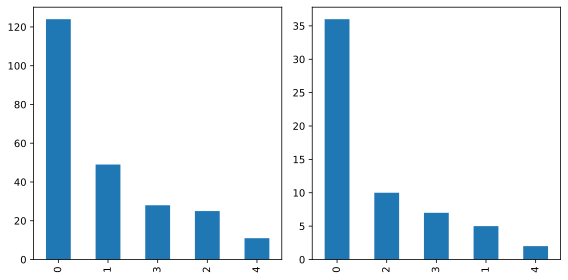

In [76]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_figwidth(8)
fig.set_figheight(4)

y_train.value_counts().plot(kind = 'bar', ax = axes[0])
y_test.value_counts().plot(kind = 'bar', ax = axes[1])

plt.tight_layout()
plt.show()

## Data Modelling

Inisialisasi Fungsi untuk Mengecek Akurasi pada Model

In [102]:
def plot_deep_learning_metrics(history, metric, val_metric, title):
  plt.plot(history.history[metric])
  plt.plot(history.history[val_metric])
  plt.title(title)
  plt.ylabel("Value")
  plt.xlabel("Epochs")
  plt.legend([metric, val_metric], loc="upper right")

Inisialisasi Variabel untuk Komparasi Akurasi dan Performa pada Data

In [110]:
epoch_sizes = [10, 30, 50, 70, 90]
batch_sizes = [10, 50, 100, 150, 200, len(x_train)]

Inisialisasi model Deep Learning

In [132]:
def get_deep_learning_model():
  dl_input_dimension = len(features)

  model = Sequential()
  model.add(Dense(16, input_dim = dl_input_dimension, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(16, activation = 'relu'))
  model.add(Dense(8, activation = 'relu'))
  model.add(Dense(5, activation = 'softmax'))

  dl_optimizer = SGD(learning_rate = 0.01)

  model.compile(loss = 'categorical_crossentropy',
                optimizer = dl_optimizer,
                metrics = ["accuracy"])
  
  return model

#### Epoch Sizes

In [133]:
histories = []

for epoch_size in epoch_sizes:
  model = get_deep_learning_model()
  history = model.fit(x_train, 
                      y_train_encoded,
                      validation_data = (x_test, y_test_encoded),
                      epochs = epoch_size,
                      batch_size = len(x_train),
                      verbose = 0)
  
  histories.append(history)

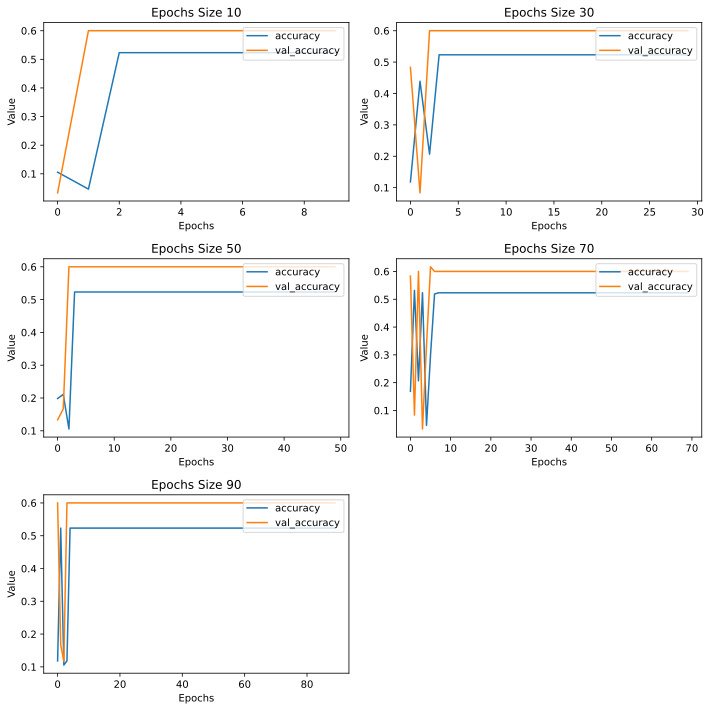

In [134]:
plt.figure(figsize = (10, 10))

for index, history in enumerate(histories):
  plt.subplot(3, 2, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Epochs Size {epoch_sizes[index]}")
plt.tight_layout()
plt.show()

#### Batch Size with Epoch = 20

In [135]:
histories = []

for batch_size in batch_sizes:
  model = get_deep_learning_model()
  history = model.fit(x_train, 
                      y_train_encoded,
                      validation_data = (x_test, y_test_encoded),
                      epochs = 90,
                      batch_size = batch_size,
                      verbose = 0)
  
  histories.append(history)

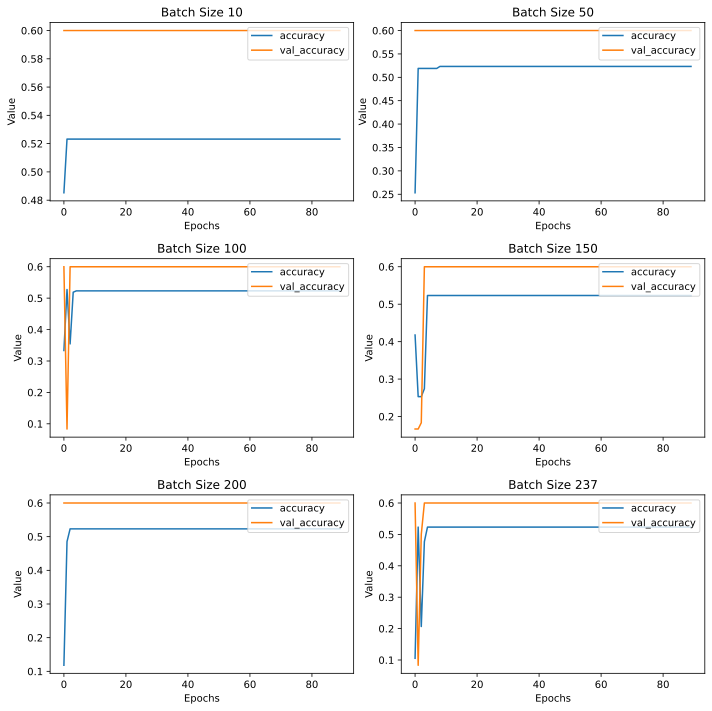

In [136]:
plt.figure(figsize = (10, 10))

for index, history in enumerate(histories):
  plt.subplot(3, 2, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Batch Size {batch_sizes[index]}")
plt.tight_layout()
plt.show()